# Unsupervised Learning - Vehicle Dataset

# Objective:

Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using raw data.


# Steps followed:

1. Loading required libraries

2. Read the data

3. Understand the data - Perform basic EDA which should include the following and print out your insights at every step. a. Shape of the data b. Data type of each attribute c. Checking the presence of missing values d. 5 point summary of numerical attributes

4. Checking the presence of outliers on each dependant variable and dropping the outliers

5. Find the relationship between the Independant and dependant variables - correlation, pairplot.

6. Scaling of data

7. Apply PCA with all components and plot the elbow graph

8. Transform the model by applying PCA with the reduced number of components derived from Elbow plot

9. Apply SVM classfiers to the data with and without PCA and analyse the model accuracies

In [1]:
#import the necessary libraries
%matplotlib inline 
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [2]:
#load the csv file and make the data frame
df = pd.read_csv("vehicle-1.csv")

In [3]:
df.head(30)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   
20           84         47.0                  75.0         153.0   
21           84         37.0                  53.0         121.0   
22           94         43.0                  64.0         173.0   
23           87         39.0                  70.0         148.0   
24           99         53.0                 105.0         219.0   
25           85         45.0                  80.0         154.0   
26           83         36.0                  54.0         119.0   
27          107         54.0                  98.0         203.0   
28          102         45.0                  85.0         193.0   
29           80         38.0                  63.0         129.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   
20                  64.0                        6          154.0   
21                  59.0                        5          123.0   
22                  69.0                        7          150.0   
23                  61.0                        7          143.0   
24                  66.0                       11          204.0   
25                  64.0                        9          147.0   
26                  57.0                        6          

In [4]:
df.tail(30)

compactness  circularity  distance_circularity  radius_ratio  \
816           90         48.0                  85.0         157.0   
817          104         53.0                 108.0         204.0   
818           95         43.0                  96.0         202.0   
819           93         42.0                  98.0         192.0   
820           87         38.0                  71.0         123.0   
821          104         56.0                  96.0         231.0   
822           95         41.0                  82.0         170.0   
823          105         54.0                 105.0         213.0   
824          106         55.0                  96.0         196.0   
825           86         39.0                  84.0         149.0   
826           95         49.0                  92.0         193.0   
827           99         57.0                 100.0         177.0   
828           89         42.0                  66.0         125.0   
829           95         49.0                  82.0         139.0   
830           97         37.0                  70.0         173.0   
831          100         47.0                  70.0         185.0   
832          108         49.0                 109.0         204.0   
833           92         46.0                  83.0         154.0   
834           82         36.0                  51.0         114.0   
835          111         58.0                 105.0         183.0   
836           87         45.0                  66.0         139.0   
837           94         46.0                  77.0         169.0   
838           95         43.0                  76.0         142.0   
839           90         44.0                  72.0         157.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
816                  64.0                       11          161.0   
817                  64.0                       11          220.0   
818                  65.0                       10          189.0   
819                  63.0                        9          185.0   
820                  53.0                        8          137.0   
821                  74.0                       11          220.0   
822                  65.0                        9          145.0   
823                  67.0                       10          200.0   
824                  60.0                       12          221.0   
825                  57.0                        8          156.0   
826                  62.0                       10          178.0   
827                  54.0                       13          224.0   
828                  53.0                        7          131.0   
829                  56.0                       11          159.0   
830                  66.0                        7          151.0   
831                  70.0                        7          162.0   
832                  61.0                       11          212.0   
833                  56.0                        6          160.0   
834                  53.0                        4          135.0   
835                  51.0                        6          265.0   
836                  58.0                        8          140.0   
837                  60.0                        8          158.0   
838                  57.0                       10          151.0   
839                  64.0                        8          137.0   
840                  56.0                        7          130.0   
841                  64.0                        8          169.0   
84

In [5]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [6]:
df.info() # Data types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

# Checking the presence of missing values:

In [7]:
df.isnull().values.any()

True

We could see that there are missing values in the given dataset.

In [8]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

The missing values are very minimal in each columns of dataset. So the missing values can be dropped from the dataset.

In [9]:
df1=df.dropna() # New df after dropping missing values

In [10]:
df1.info() # Perform all basic analysis on the new df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [11]:
df1.shape

(813, 19)

In [12]:
df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [13]:
df1.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [14]:
pd.value_counts(df1['class']) # 'class' is the only categorical variable, which is our target variable here

car    413
bus    205
van    195
Name: class, dtype: int64

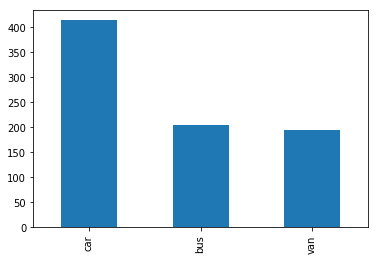

In [15]:
pd.value_counts(df1['class']).plot(kind="bar")

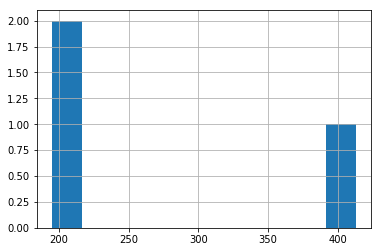

In [16]:
pd.value_counts(df1['class']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B740270>,
      dtype=object)

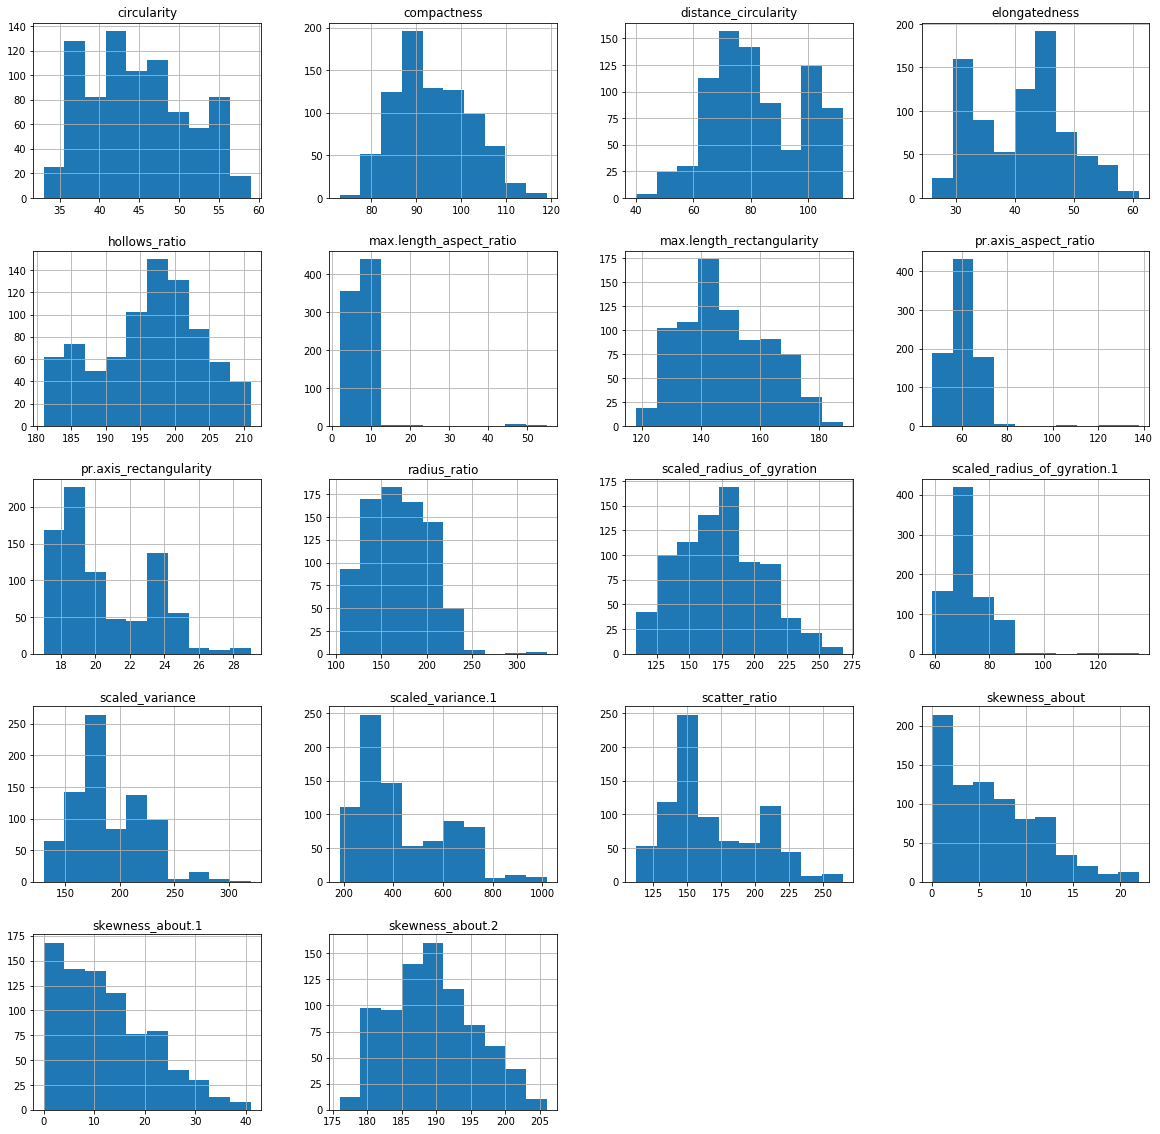

In [17]:
df1.hist(figsize=(20,20))

# Checking the presence of outliers:

Let us see the box plots for each dependant variable and check the presence of outliers. If the outliers are present, find the outliers by calculating the quadratile values and drop the outliers from each variables.

The presence of outliers can impact the model accuracy so it is important to drop it from data frame.

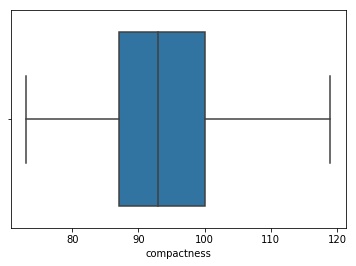

In [18]:
sns.boxplot(df1['compactness']) # No outliers and it seems to normally distributed

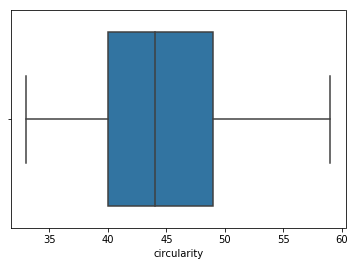

In [19]:
sns.boxplot(df1['circularity']) # No outliers present and it is normally distributed

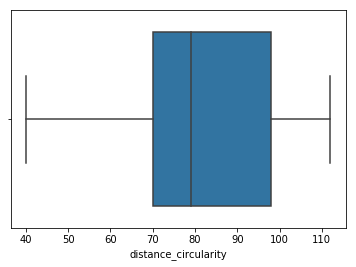

In [20]:
sns.boxplot(df1['distance_circularity']) # No outliers present and it is right skewed

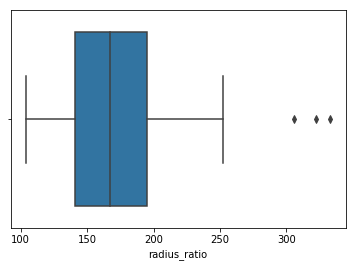

In [21]:
sns.boxplot(df1['radius_ratio']) # Outliers are present

In [22]:
q1 = np.quantile(df1['radius_ratio'],0.25)
q2 = np.quantile(df1['radius_ratio'],0.50)
q3 = np.quantile(df1['radius_ratio'],0.75)
IQR = q3-q1
print(df1['radius_ratio'].quantile(0.75)+(1.5 * IQR))

276.0


In [23]:
print('No. of Outliers in radius_ratio:',df1[df1['radius_ratio']>276]['radius_ratio'].shape[0])

No. of Outliers in radius_ratio: 3


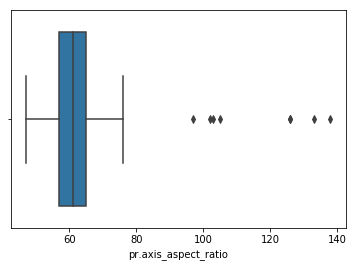

In [24]:
sns.boxplot(df1['pr.axis_aspect_ratio']) # Outliers are present

In [25]:
q1 = np.quantile(df1['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(df1['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(df1['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
print(df1['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR))

77.0


In [26]:
print('No. of Outliers in pr.axis_aspect_ratio:',df1[df1['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

No. of Outliers in pr.axis_aspect_ratio: 8


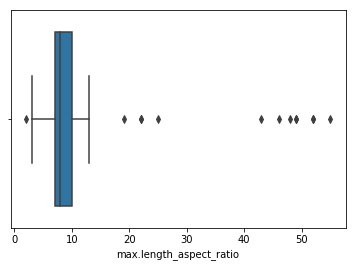

In [27]:
sns.boxplot(df1['max.length_aspect_ratio']) # Outliers are present on both tails

In [28]:
q1 = np.quantile(df1['max.length_aspect_ratio'],0.25)
q2 = np.quantile(df1['max.length_aspect_ratio'],0.50)
q3 = np.quantile(df1['max.length_aspect_ratio'],0.75)
IQR = q3-q1
print(df1['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR))
print(df1['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR))

14.5
2.5


In [29]:
print('No. of Outliers in max.length_aspect_ratio above:',df1[df1['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print('No. of Outliers in max.length_aspect_ratio below:',df1[df1['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

No. of Outliers in max.length_aspect_ratio above: 12
No. of Outliers in max.length_aspect_ratio below: 1


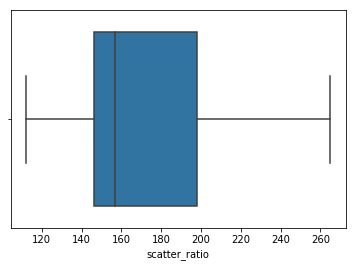

In [30]:
sns.boxplot(df1['scatter_ratio']) # No Outliers

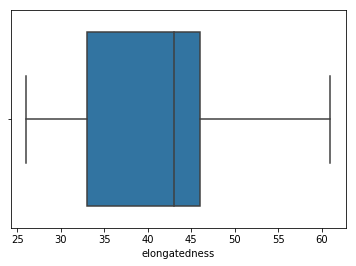

In [31]:
sns.boxplot(df1['elongatedness']) # No Outliers

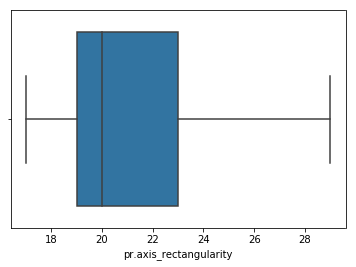

In [32]:
sns.boxplot(df1['pr.axis_rectangularity']) # No outliers

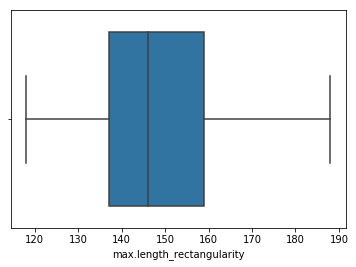

In [33]:
sns.boxplot(df1['max.length_rectangularity']) # No Outliers

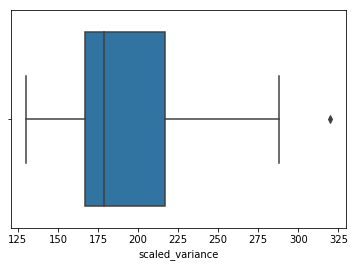

In [34]:
sns.boxplot(df1['scaled_variance']) # Outliers are present

In [35]:
q1 = np.quantile(df1['scaled_variance'],0.25)
q2 = np.quantile(df1['scaled_variance'],0.50)
q3 = np.quantile(df1['scaled_variance'],0.75)
IQR = q3-q1
print(df1['scaled_variance'].quantile(0.75)+(1.5 * IQR))

292.0


In [36]:
print('No. of Outliers in scaled_variance:',df1[df1['scaled_variance']>292]['scaled_variance'].shape[0])

No. of Outliers in scaled_variance: 1


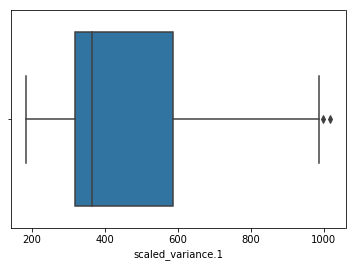

In [37]:
sns.boxplot(df1['scaled_variance.1']) # Outliers are present

In [38]:
q1 = np.quantile(df1['scaled_variance.1'],0.25)
q2 = np.quantile(df1['scaled_variance.1'],0.50)
q3 = np.quantile(df1['scaled_variance.1'],0.75)
IQR = q3-q1
print(df1['scaled_variance.1'].quantile(0.75)+(1.5 * IQR))

988.0


In [39]:
print('No. of Outliers in scaled_variance.1:',df1[df1['scaled_variance.1']>988]['scaled_variance.1'].shape[0])

No. of Outliers in scaled_variance.1: 2


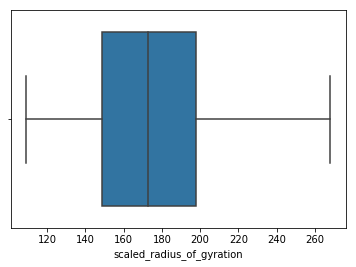

In [40]:
sns.boxplot(df1['scaled_radius_of_gyration']) # No Outliers

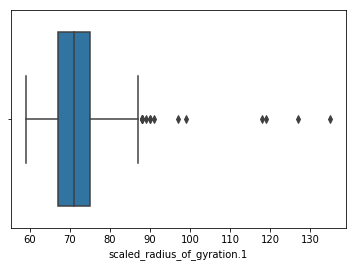

In [41]:
sns.boxplot(df1['scaled_radius_of_gyration.1']) # Many outliers are present

In [42]:
q1 = np.quantile(df1['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(df1['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(df1['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
print(df1['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR))

87.0


In [43]:
print('No. of Outliers in scaled_radius_of_gyration.1:',df1[df1['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

No. of Outliers in scaled_radius_of_gyration.1: 15


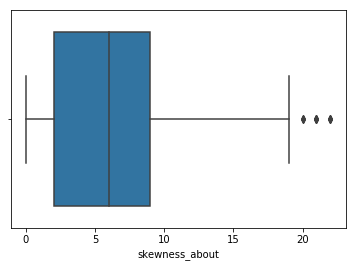

In [44]:
sns.boxplot(df1['skewness_about']) # Outliers are present

In [45]:
q1 = np.quantile(df1['skewness_about'],0.25)
q2 = np.quantile(df1['skewness_about'],0.50)
q3 = np.quantile(df1['skewness_about'],0.75)
IQR = q3-q1
print(df1['skewness_about'].quantile(0.75)+(1.5 * IQR))

19.5


In [46]:
print('No. of Outliers in skewness_about:',df1[df1['skewness_about']>19.5]['skewness_about'].shape[0])

No. of Outliers in skewness_about: 12


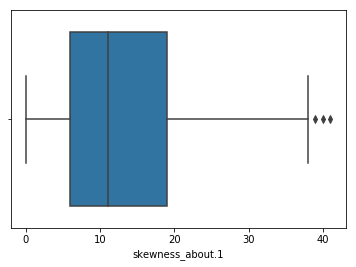

In [47]:
sns.boxplot(df1['skewness_about.1']) # Outliers are present

In [48]:
q1 = np.quantile(df1['skewness_about.1'],0.25)
q2 = np.quantile(df1['skewness_about.1'],0.50)
q3 = np.quantile(df1['skewness_about.1'],0.75)
IQR = q3-q1
print(df1['skewness_about.1'].quantile(0.75)+(1.5 * IQR))

38.5


In [49]:
print('No. of Outliers in skewness_about.1:',df1[df1['skewness_about.1']>38.5]['skewness_about.1'].shape[0])

No. of Outliers in skewness_about.1: 3


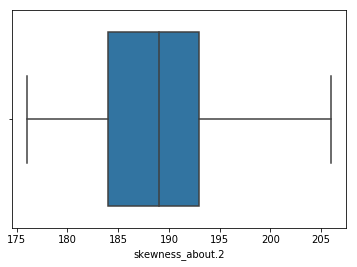

In [50]:
sns.boxplot(df1['skewness_about.2'])  # No outliers

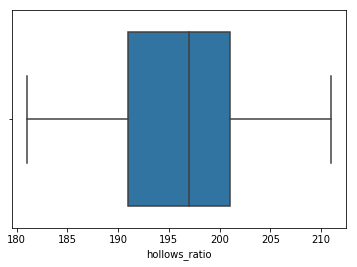

In [51]:
sns.boxplot(df1['hollows_ratio']) # No outliers

In [52]:
## Drop all the outliers from the dataset and form a new clean dataset

df1.drop(df1[df1['radius_ratio']>276].index,axis=0,inplace=True)
df1.drop(df1[df1['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)
df1.drop(df1[df1['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
df1.drop(df1[df1['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)
df1.drop(df1[df1['scaled_variance']>292].index,axis=0,inplace=True)
df1.drop(df1[df1['scaled_variance.1']>988].index,axis=0,inplace=True)
df1.drop(df1[df1['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)
df1.drop(df1[df1['skewness_about']>19.5].index,axis=0,inplace=True)
df1.drop(df1[df1['skewness_about.1']>38.5].index,axis=0,inplace=True)

In [53]:
df1.shape # Shape of the latest data

(778, 19)

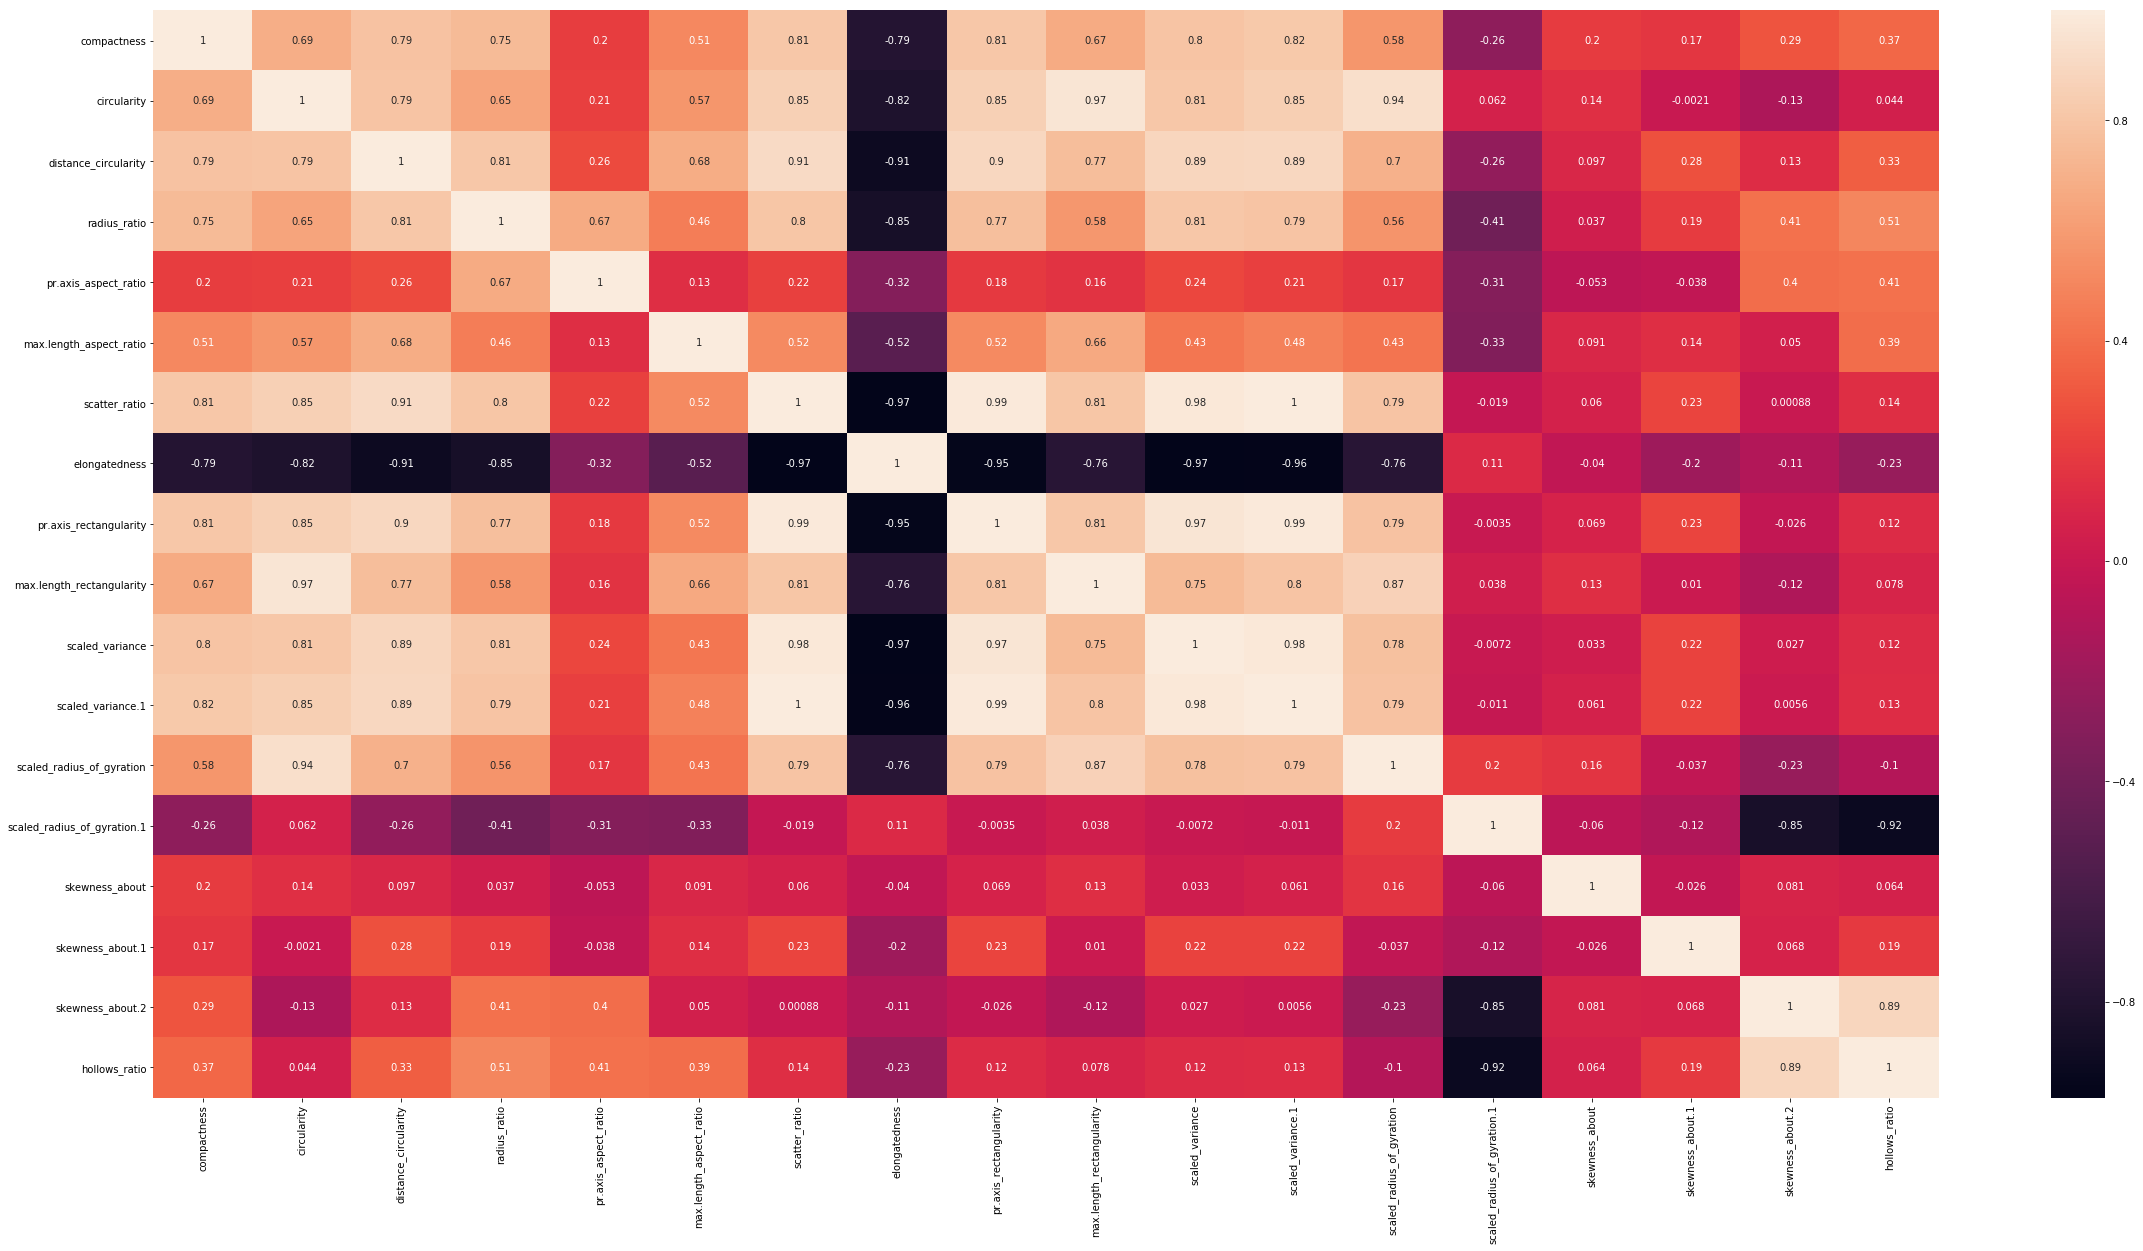

In [54]:
## Plot the heat map for the correlation on the new dataset

plt.figure(figsize=(40,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

From the heat map we can see that most of the variables are strongly correlated with each other.

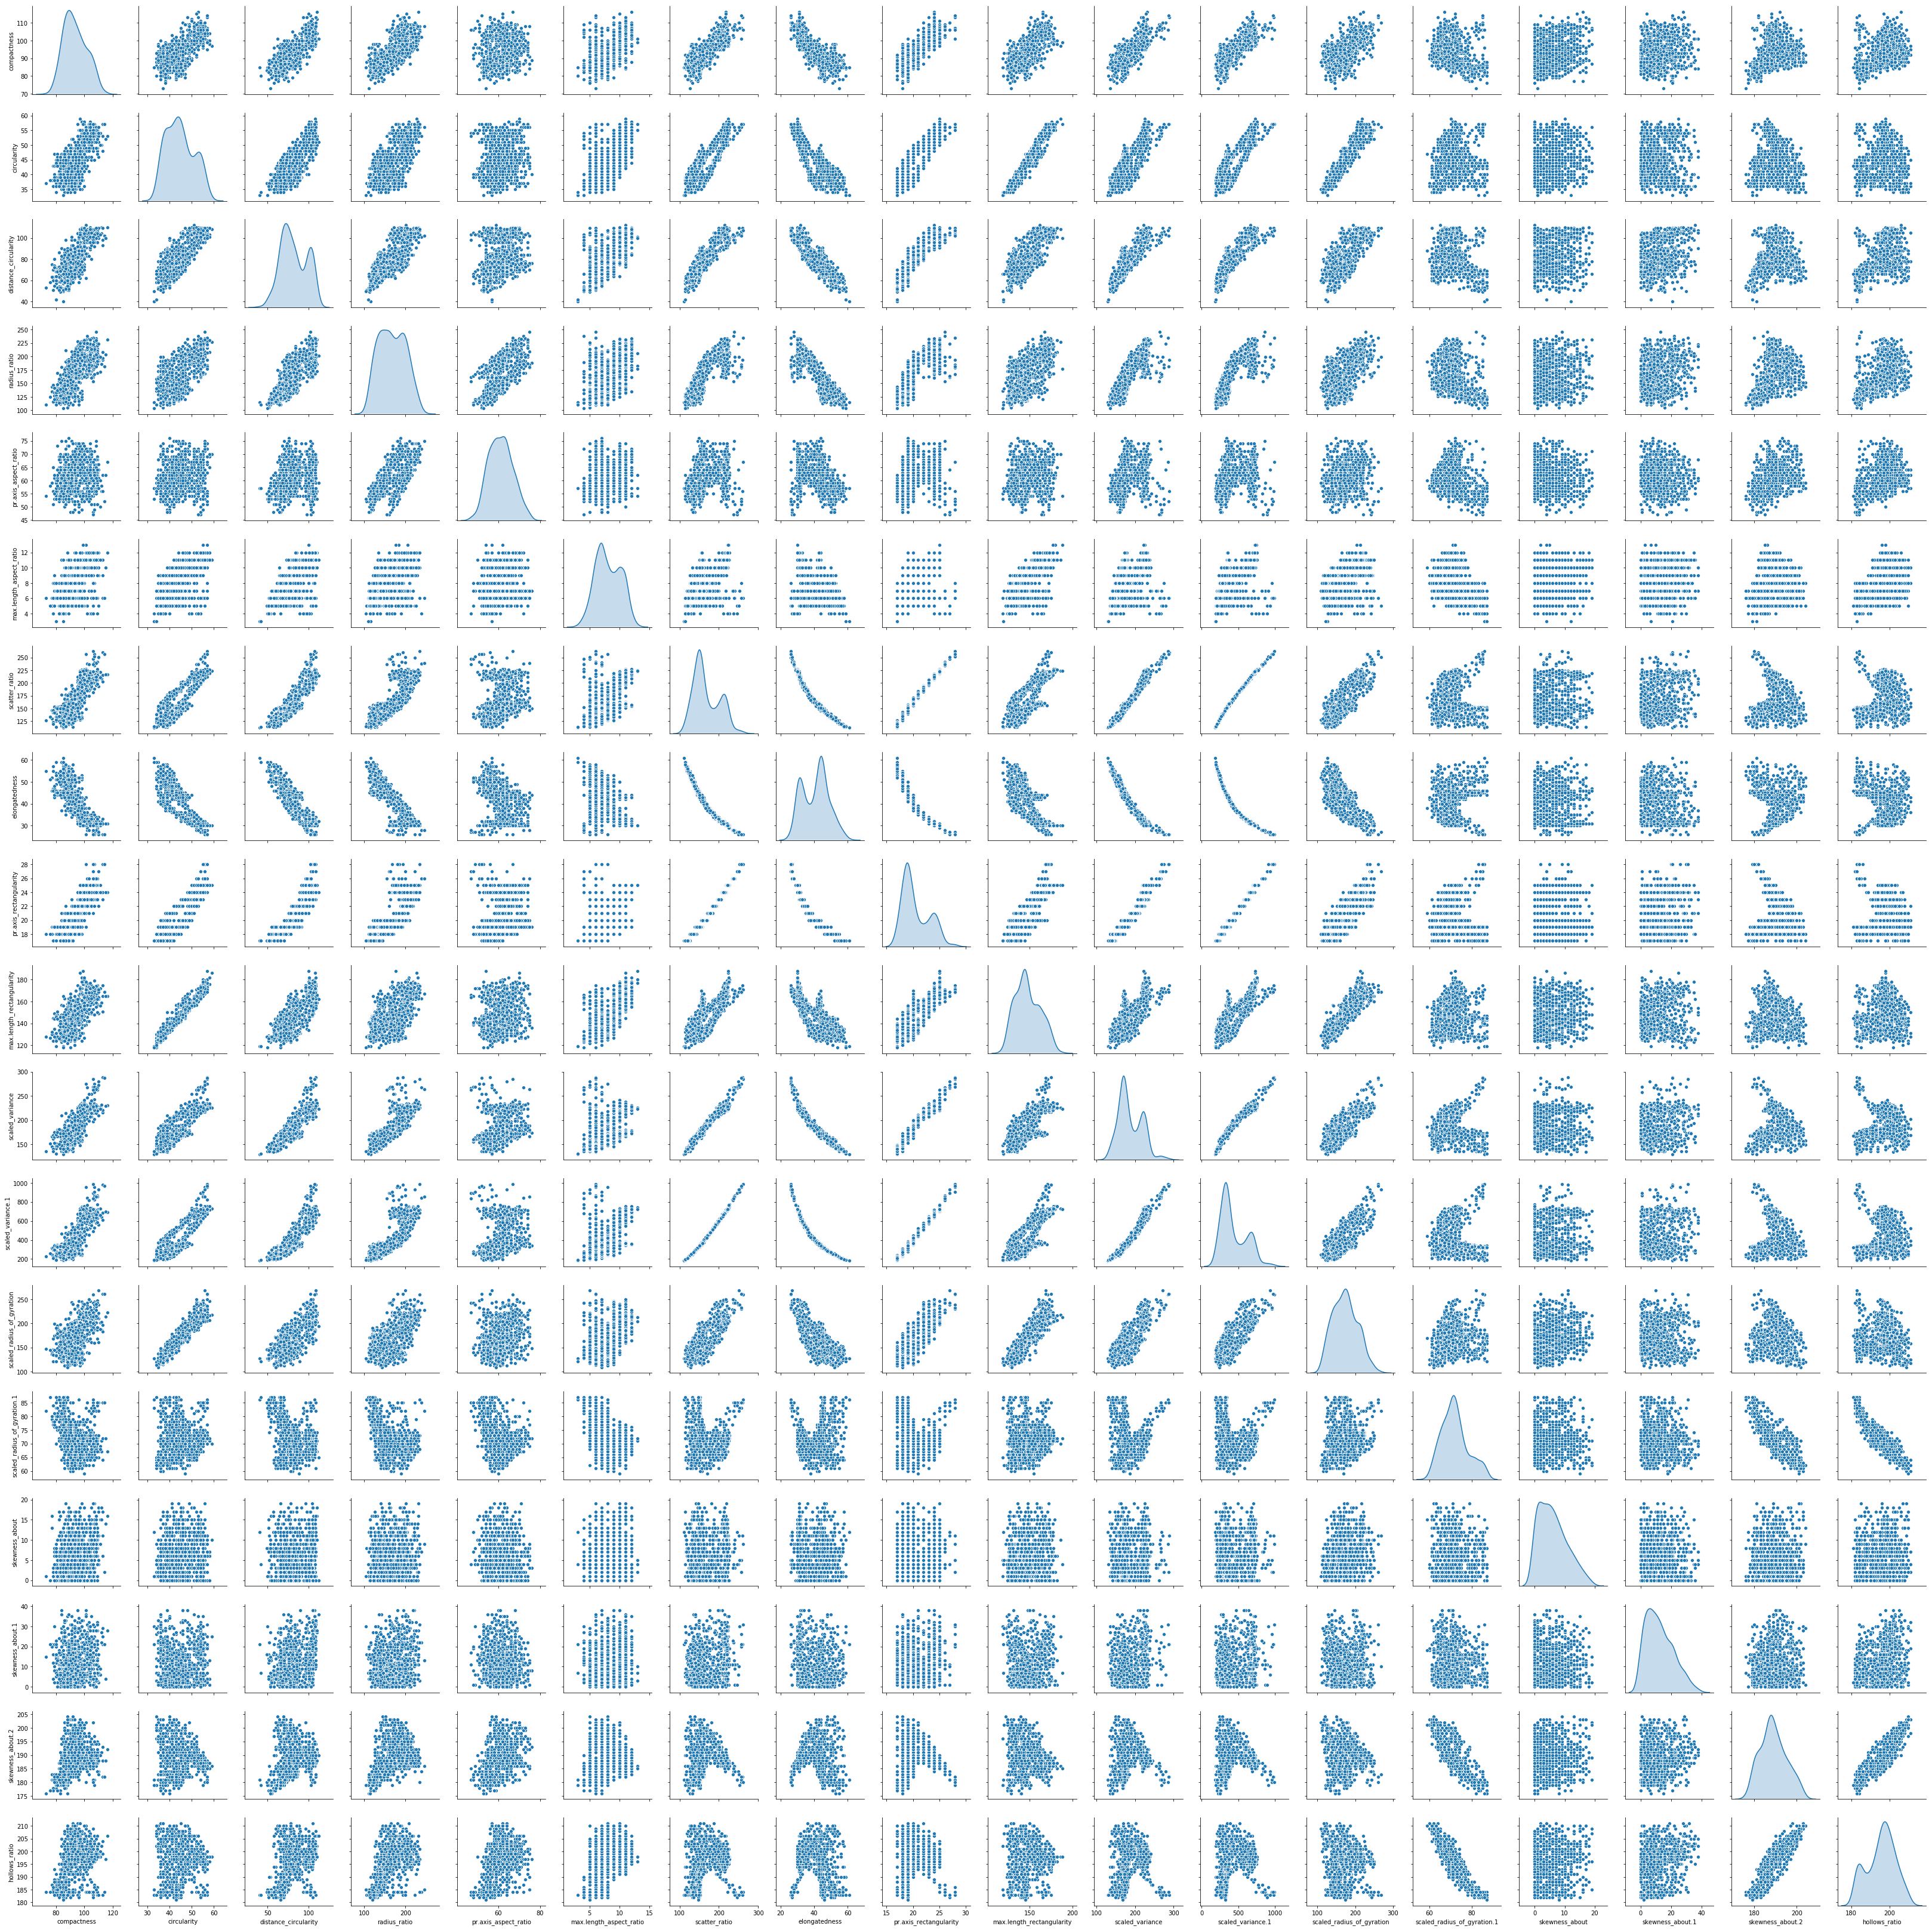

In [55]:
# Perform the Multi variate analysis using pair plot by droppinf the independant/ target variable

# independant variables
X = df1.drop(['class'], axis=1)
# the dependent variable
y = df1[['class']]

sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [56]:
X.shape

(778, 18)

# Scaling of data using zscore

The data need to scaled for better model and to handle the dimension/data types mismatch between all variables.

In [57]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.177847     0.526256              0.059168      0.313734   
1    -0.319421    -0.617851              0.123460     -0.852630   
2     1.296698     0.853143              1.537880      1.290958   
3    -0.070787    -0.617851             -0.005124     -0.285209   
6     0.426480    -0.290964             -0.583750      0.156118   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.897556                 0.909007      -0.199465   
1             -0.754795                 0.422620      -0.598000   
2              0.836616                 0.909007       1.180080   
3              0.306145                 0.422620      -0.751283   
6              0.659792                -1.036543      -0.475374   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.135546               -0.217589                   0.771420   
1       0.524676               -0.612191                  -0.334747   
2      -1.161557                0.966217                   0.702284   
3       0.654386               -0.612191                  -0.334747   
6       0.135546               -0.612191                  -0.334747   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.387636          -0.341118                   0.312894   
1        -0.587469          -0.625231                  -0.496676   
2         1.177721           1.143224                   1.433836   
3        -0.920524          -0.746993                  -1.461932   
6        -0.387636          -0.445486                  -0.060754   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.319446       -0.036294          0.381140   
1                     0.006708        0.610356          0.154351   
2                     0.169784        1.688105         -0.412622   
3                    -1.460983       -0.036294         -0.299228   
6                    -0.971753        1.472555         -1.319779   

   skewness_about.2  hollows_ratio  
0         -0.333447       0.167883  
1         -0.006101       0.442569  
2         -0.169774       0.030540  
3          1.630629       1.541314  
6          1.794302       1.129285

# Create the Covariance matrix

In [58]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00128700e+00  6.86247246e-01  7.87505293e-01  7.46771440e-01
   2.04939977e-01  5.12283067e-01  8.12881431e-01 -7.88349738e-01
   8.12905174e-01  6.73782504e-01  7.96401783e-01  8.19887792e-01
   5.76023344e-01 -2.65267720e-01  1.97487290e-01  1.69434494e-01
   2.92836011e-01  3.71157507e-01]
 [ 6.86247246e-01  1.00128700e+00  7.93336484e-01  6.46067365e-01
   2.10187939e-01  5.72687787e-01  8.55995384e-01 -8.20856804e-01
   8.55313028e-01  9.66703354e-01  8.15382274e-01  8.49756656e-01
   9.36901509e-01  6.21569802e-02  1.38644834e-01 -2.14108305e-03
  -1.26272800e-01  4.38549912e-02]
 [ 7.87505293e-01  7.93336484e-01  1.00128700e+00  8.15625667e-01
   2.57276757e-01  6.81069140e-01  9.10833561e-01 -9.11154567e-01
   9.00470612e-01  7.67926678e-01  8.91113878e-01  8.95421670e-01
   7.04373288e-01 -2.55844099e-01  9.69453477e-02  2.77271339e-01
   1.27935606e-01  3.33163683e-01]
 [ 7.46771440e-01  6.46067365e-01  8.15625667e-01  1.00128700e+00
   6.74039186e-01  4.64005520e-01  8.

# Apply PCA with all components

In [59]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
print(pca.explained_variance_) ## Eigen values

[9.87520281e+00 3.33543258e+00 1.19754165e+00 1.15541983e+00
 8.86385749e-01 6.48872319e-01 3.26912233e-01 2.28779559e-01
 1.11005882e-01 7.67651421e-02 5.83073605e-02 4.04225904e-02
 2.69721757e-02 2.11923277e-02 1.55104875e-02 1.20260344e-02
 6.06273182e-03 3.54559807e-04]


In [61]:
print(pca.components_) ## Eigen vectors

[[ 2.70963937e-01  2.85498616e-01  3.00756696e-01  2.73648012e-01
   1.02876273e-01  1.98762043e-01  3.09692679e-01 -3.07017506e-01
   3.06820802e-01  2.74168749e-01  3.02498907e-01  3.07162213e-01
   2.59825044e-01 -5.01854837e-02  3.53690148e-02  6.32634323e-02
   3.55974003e-02  8.81040107e-02]
 [-8.72522599e-02  1.43599934e-01 -4.16504206e-02 -1.98016825e-01
  -2.51189765e-01 -8.25042940e-02  7.14270483e-02 -1.09817948e-02
   8.47209207e-02  1.31005476e-01  6.74747787e-02  7.47652392e-02
   2.10158848e-01  5.05191356e-01 -1.54690345e-02 -8.14686691e-02
  -5.08122400e-01 -5.06717268e-01]
 [-2.24781542e-02 -2.12492148e-01  6.81966354e-02  5.12261100e-02
  -1.00850129e-01 -1.68740481e-01  1.13838973e-01 -9.67003862e-02
   1.11506102e-01 -2.31363392e-01  1.47774860e-01  1.17721336e-01
  -2.15281029e-01  7.46102368e-02 -5.08187752e-01  6.85052937e-01
  -5.08939226e-02 -4.89803951e-02]
 [ 1.34335954e-01 -2.54326664e-02  1.05447333e-01 -2.50175924e-01
  -6.05186878e-01  3.04854560e-01 -8.

In [62]:
print(pca.explained_variance_ratio_) ## Percentage of variation explained by each eigen Vector

[5.47917208e-01 1.85063633e-01 6.64445772e-02 6.41074844e-02
 4.91803576e-02 3.60021274e-02 1.81384465e-02 1.26936388e-02
 6.15906674e-03 4.25924846e-03 3.23513418e-03 2.24281296e-03
 1.49652817e-03 1.17583823e-03 8.60586176e-04 6.67254264e-04
 3.36385506e-04 1.96724486e-05]


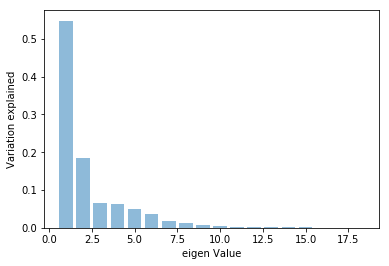

In [63]:
plt.bar(list(range(1,19)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

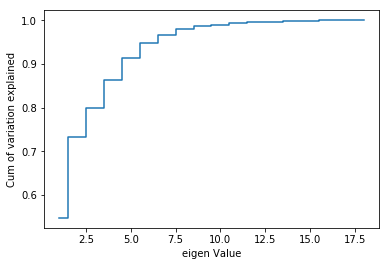

In [64]:
# Draw the elbow plot between the Eigen values and the Variances

plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Transformation of Data

From the elbow plot we can see that around 95% variance is covered by 8 dimensions. We can now reduce the dimension by considering first 8 principle components and trasnform the scaled data by applying PCA.

In [65]:
pca_8 = PCA(n_components=8)
pca_8.fit(XScaled)
print(pca_8.components_)
print(pca_8.explained_variance_ratio_)
Xpca_8 = pca_8.transform(XScaled)

[[ 0.27096394  0.28549862  0.3007567   0.27364801  0.10287627  0.19876204
   0.30969268 -0.30701751  0.3068208   0.27416875  0.30249891  0.30716221
   0.25982504 -0.05018548  0.03536901  0.06326343  0.0355974   0.08810401]
 [-0.08725226  0.14359993 -0.04165042 -0.19801682 -0.25118976 -0.08250429
   0.07142705 -0.01098179  0.08472092  0.13100548  0.06747478  0.07476524
   0.21015885  0.50519136 -0.01546903 -0.08146867 -0.5081224  -0.50671727]
 [-0.02247815 -0.21249215  0.06819664  0.05122611 -0.10085013 -0.16874048
   0.11383897 -0.09670039  0.1115061  -0.23136339  0.14777486  0.11772134
  -0.21528103  0.07461024 -0.50818775  0.68505294 -0.05089392 -0.0489804 ]
 [ 0.13433595 -0.02543267  0.10544733 -0.25017592 -0.60518688  0.30485456
  -0.00821853  0.07796351  0.02016044  0.05790063 -0.06478695 -0.0129032
  -0.07586499 -0.1334399   0.49245996  0.39656095 -0.0289588   0.09983039]
 [ 0.12726241 -0.11036766 -0.08391918  0.13909805  0.15326814 -0.59299744
   0.06862299 -0.06855374  0.059427

In [66]:
Xpca_8

array([[ 0.62036446, -0.5827002 , -0.57936737, ..., -1.88496426,
        -0.14651671,  0.71155102],
       [-1.5076911 , -0.31717684, -0.28040192, ..., -0.13782009,
         0.20495491, -0.12821167],
       [ 3.99024033,  0.30578782, -1.20605392, ..., -0.51337435,
         0.81157643, -0.18410011],
       ...,
       [ 5.22102244, -0.08749274, -0.63586923, ...,  0.16368275,
         0.88906027,  0.40750552],
       [-3.29278445, -1.09875819,  1.92182303, ..., -0.12918454,
        -0.28743251, -0.44233657],
       [-5.00708066,  0.41126827,  1.3162758 , ...,  0.31018837,
        -0.4048828 ,  0.21912752]])

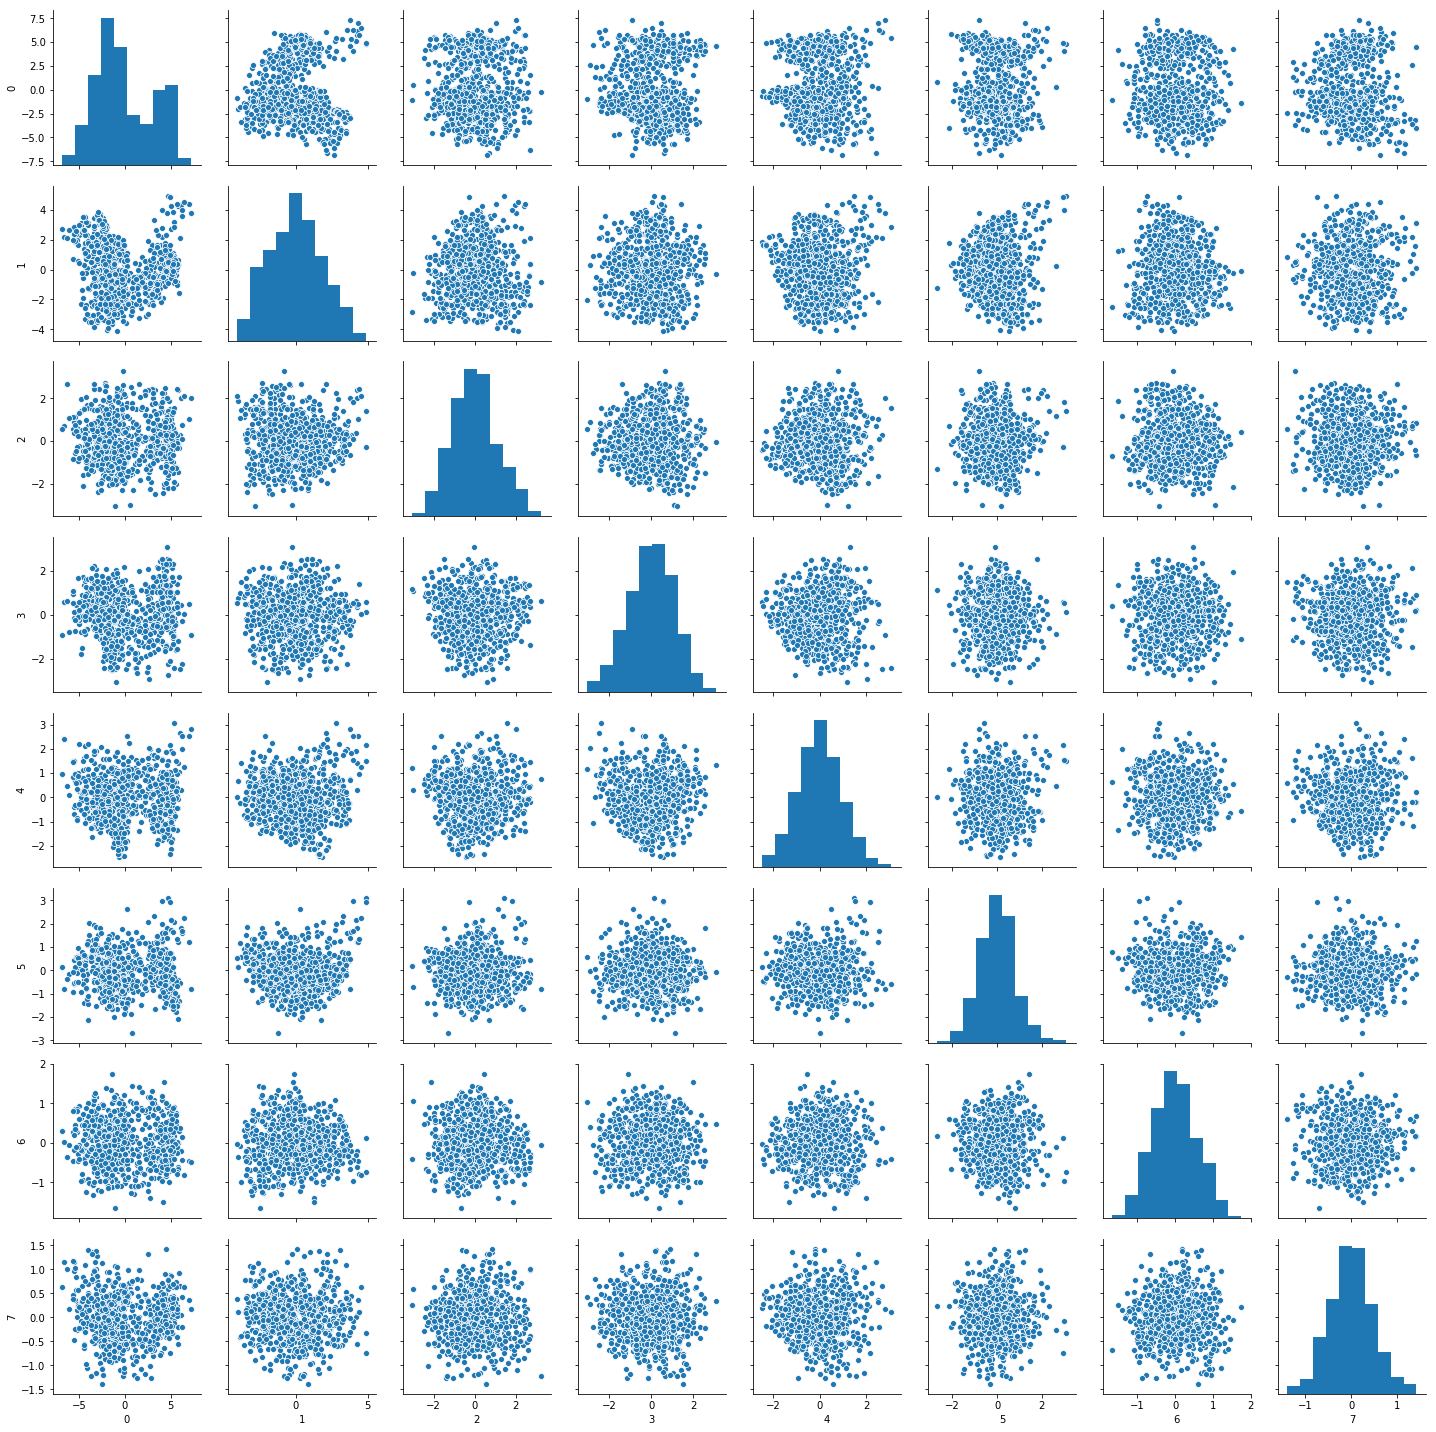

In [67]:
sns.pairplot(pd.DataFrame(Xpca_8)) # Apply pair plot on the new dataset after PCA.

We could see that all the variables are independant in the tranformed dataset and dimension also been reduced from 18 to 8

# Splitting of Data into Training and Test Datasets:

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=10)


# Apply SVM on the Scaled Dataset before PCA

In [69]:
from sklearn.svm import SVC
from sklearn import metrics
svm=SVC() #Default hyperparameters
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print('Accuracy Score:',end='')
print(metrics.accuracy_score(y_test,y_pred))
acc_before_pca=metrics.accuracy_score(y_test,y_pred)

Accuracy Score:0.9658119658119658


# Split the Dataset formed after PCA

In [70]:
Xpca_train, Xpca_test, y_train, y_test = train_test_split(Xpca_8, y, test_size=0.3, random_state=10)

# Apply SVM on the dataset after PCA

In [71]:
svm=SVC() #Default hyperparameters
svm.fit(Xpca_train,y_train)
y_pred=svm.predict(Xpca_test)
print('Accuracy Score:',end='')
print(metrics.accuracy_score(y_test,y_pred))
acc_after_pca=metrics.accuracy_score(y_test,y_pred)

Accuracy Score:0.9401709401709402


# Apply Linear SVM classifier for different values of C such as 0.01, 0.05, 0.5 & 1 for data with and without PCA

In [72]:
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy for Linear SVC before PCA with C as 0.01: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_bef_pca1=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC before PCA with C as 0.01: 0.88
              precision    recall  f1-score   support

         bus       0.82      0.88      0.85        64
         car       0.93      0.87      0.90       115
         van       0.85      0.91      0.88        55

   micro avg       0.88      0.88      0.88       234
   macro avg       0.87      0.88      0.88       234
weighted avg       0.88      0.88      0.88       234



In [73]:
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for Linear SVC after PCA with C as 0.01: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_aft_pca1=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC after PCA with C as 0.01: 0.85
              precision    recall  f1-score   support

         bus       0.81      0.84      0.82        64
         car       0.91      0.84      0.87       115
         van       0.80      0.87      0.83        55

   micro avg       0.85      0.85      0.85       234
   macro avg       0.84      0.85      0.84       234
weighted avg       0.85      0.85      0.85       234



In [74]:
svm = SVC(kernel='linear', C=0.05, random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy for Linear SVC before PCA with C as 0.05: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_bef_pca2=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC before PCA with C as 0.05: 0.92
              precision    recall  f1-score   support

         bus       0.91      0.95      0.93        64
         car       0.95      0.90      0.93       115
         van       0.86      0.91      0.88        55

   micro avg       0.92      0.92      0.92       234
   macro avg       0.91      0.92      0.91       234
weighted avg       0.92      0.92      0.92       234



In [75]:
svm = SVC(kernel='linear', C=0.05, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for Linear SVC after PCA with C as 0.05: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_aft_pca2=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC after PCA with C as 0.05: 0.85
              precision    recall  f1-score   support

         bus       0.80      0.86      0.83        64
         car       0.90      0.83      0.86       115
         van       0.83      0.87      0.85        55

   micro avg       0.85      0.85      0.85       234
   macro avg       0.84      0.86      0.85       234
weighted avg       0.85      0.85      0.85       234



In [76]:
svm = SVC(kernel='linear', C=0.5, random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy for Linear SVC before PCA with C as 0.5: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_bef_pca3=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC before PCA with C as 0.5: 0.96
              precision    recall  f1-score   support

         bus       0.98      0.95      0.97        64
         car       0.96      0.96      0.96       115
         van       0.91      0.96      0.94        55

   micro avg       0.96      0.96      0.96       234
   macro avg       0.95      0.96      0.96       234
weighted avg       0.96      0.96      0.96       234



In [77]:
svm = SVC(kernel='linear', C=0.5, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for Linear SVC after PCA with C as 0.5: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_aft_pca3=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC after PCA with C as 0.5: 0.87
              precision    recall  f1-score   support

         bus       0.83      0.81      0.82        64
         car       0.88      0.88      0.88       115
         van       0.89      0.91      0.90        55

   micro avg       0.87      0.87      0.87       234
   macro avg       0.87      0.87      0.87       234
weighted avg       0.87      0.87      0.87       234



In [78]:
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy for Linear SVC before PCA with C as 1: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_bef_pca4=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC before PCA with C as 1: 0.97
              precision    recall  f1-score   support

         bus       0.98      0.97      0.98        64
         car       0.97      0.97      0.97       115
         van       0.93      0.96      0.95        55

   micro avg       0.97      0.97      0.97       234
   macro avg       0.96      0.97      0.96       234
weighted avg       0.97      0.97      0.97       234



In [79]:
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for Linear SVC after PCA with C as 1: %.2f' %metrics.accuracy_score(y_test, y_pred))
linear_aft_pca4=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for Linear SVC after PCA with C as 1: 0.87
              precision    recall  f1-score   support

         bus       0.84      0.81      0.83        64
         car       0.88      0.88      0.88       115
         van       0.88      0.91      0.89        55

   micro avg       0.87      0.87      0.87       234
   macro avg       0.86      0.87      0.87       234
weighted avg       0.87      0.87      0.87       234



# Apply rbf SVM classifier for different values of C such as 0.01, 0.05, 0.5 & 1 for data with and without PCA

In [80]:
svm = SVC(kernel='rbf', C=0.01, random_state=0)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
print('Accuracy for rbf SVC before PCA with C as 0.01: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_bef_pca1=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC before PCA with C as 0.01: 0.49
              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        64
         car       0.49      1.00      0.66       115
         van       0.00      0.00      0.00        55

   micro avg       0.49      0.49      0.49       234
   macro avg       0.16      0.33      0.22       234
weighted avg       0.24      0.49      0.32       234



In [81]:
svm = SVC(kernel='rbf', C=0.01, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for rbf SVC after PCA with C as 0.01: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_aft_pca1=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC after PCA with C as 0.01: 0.49
              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        64
         car       0.49      1.00      0.66       115
         van       0.00      0.00      0.00        55

   micro avg       0.49      0.49      0.49       234
   macro avg       0.16      0.33      0.22       234
weighted avg       0.24      0.49      0.32       234



In [82]:
svm = SVC(kernel='rbf', C=0.05, random_state=0)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
print('Accuracy for rbf SVC before PCA with C as 0.05: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_bef_pca2=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC before PCA with C as 0.05: 0.66
              precision    recall  f1-score   support

         bus       1.00      0.30      0.46        64
         car       0.59      1.00      0.74       115
         van       0.95      0.36      0.53        55

   micro avg       0.66      0.66      0.66       234
   macro avg       0.85      0.55      0.58       234
weighted avg       0.79      0.66      0.61       234



In [83]:
svm = SVC(kernel='rbf', C=0.05, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for rbf SVC after PCA with C as 0.05: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_aft_pca2=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC after PCA with C as 0.05: 0.65
              precision    recall  f1-score   support

         bus       1.00      0.36      0.53        64
         car       0.59      1.00      0.74       115
         van       0.94      0.27      0.42        55

   micro avg       0.65      0.65      0.65       234
   macro avg       0.84      0.54      0.56       234
weighted avg       0.78      0.65      0.61       234



In [84]:
svm = SVC(kernel='rbf', C=0.5, random_state=0)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
print('Accuracy for rbf SVC before PCA with C as 0.5: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_bef_pca3=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC before PCA with C as 0.5: 0.95
              precision    recall  f1-score   support

         bus       0.97      0.98      0.98        64
         car       0.96      0.96      0.96       115
         van       0.91      0.89      0.90        55

   micro avg       0.95      0.95      0.95       234
   macro avg       0.94      0.94      0.94       234
weighted avg       0.95      0.95      0.95       234



In [85]:
svm = SVC(kernel='rbf', C=0.5, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for rbf SVC after PCA with C as 0.5: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_aft_pca3=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC after PCA with C as 0.5: 0.91
              precision    recall  f1-score   support

         bus       0.92      0.95      0.94        64
         car       0.93      0.93      0.93       115
         van       0.87      0.84      0.85        55

   micro avg       0.91      0.91      0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.91      0.91      0.91       234



In [86]:
svm = SVC(kernel='rbf', C=1, random_state=0)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
print('Accuracy for rbf SVC before PCA with C as 1: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_bef_pca4=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC before PCA with C as 1: 0.97
              precision    recall  f1-score   support

         bus       1.00      0.98      0.99        64
         car       0.98      0.96      0.97       115
         van       0.90      0.96      0.93        55

   micro avg       0.97      0.97      0.97       234
   macro avg       0.96      0.97      0.96       234
weighted avg       0.97      0.97      0.97       234



In [87]:
svm = SVC(kernel='rbf', C=1, random_state=0)
svm.fit(Xpca_train,y_train)

y_pred = svm.predict(Xpca_test)
print('Accuracy for rbf SVC after PCA with C as 1: %.2f' %metrics.accuracy_score(y_test, y_pred))
rbf_aft_pca4=metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy for rbf SVC after PCA with C as 1: 0.94
              precision    recall  f1-score   support

         bus       0.95      0.97      0.96        64
         car       0.96      0.95      0.95       115
         van       0.89      0.89      0.89        55

   micro avg       0.94      0.94      0.94       234
   macro avg       0.93      0.94      0.93       234
weighted avg       0.94      0.94      0.94       234



# Print all the model scores and find the best fitting model

In [88]:
models = pd.DataFrame({
    'Model': ['SVM - default', 'SVM Linear with C 0.01', 'SVM Linear with C 0.05', 'SVM Linear with C 0.5', 'SVM Linear with C 1', 'SVM rbf with C 0.01', 'SVM rbf with C 0.05', 'SVM rbf with C 0.5', 'SVM rbf with C 1'],
    'Score before PCA': [acc_before_pca, linear_bef_pca1, linear_bef_pca2, linear_bef_pca3, linear_bef_pca4, rbf_bef_pca1, rbf_bef_pca2, rbf_bef_pca3, rbf_bef_pca4],
    'Score after PCA': [acc_after_pca, linear_aft_pca1, linear_aft_pca2, linear_aft_pca3, linear_aft_pca4, rbf_aft_pca1, rbf_aft_pca2, rbf_aft_pca3, rbf_aft_pca4]})
models

Model  Score before PCA  Score after PCA
0           SVM - default          0.965812         0.940171
1  SVM Linear with C 0.01          0.880342         0.850427
2  SVM Linear with C 0.05          0.918803         0.850427
3   SVM Linear with C 0.5          0.957265         0.867521
4     SVM Linear with C 1          0.965812         0.867521
5     SVM rbf with C 0.01          0.491453         0.491453
6     SVM rbf with C 0.05          0.658120         0.653846
7      SVM rbf with C 0.5          0.948718         0.914530
8        SVM rbf with C 1          0.965812         0.940171

From the above scores, by comparing the accuracies without PCA, we can see that almost all the models give almost equal or better accuracies with PCA.

PCA is always recommended to reduce the dimension and give better accuracies on large datasets.